In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

In [2]:
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('./Data/spy.csv')

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Weekday',
       'Week', 'Month', 'Year'],
      dtype='object')

<AxesSubplot: >

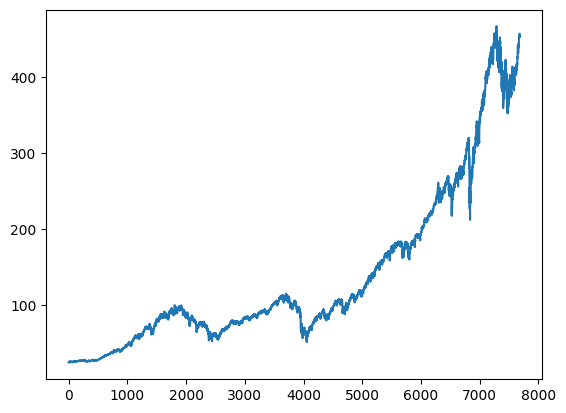

In [4]:
df['Close'].plot()

In [5]:
df['log_returns'] = np.log(df.Close/df.Close.shift(1))

In [6]:
df.dropna(inplace=True)

In [7]:
#df.set_index('Date', inplace=True)

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,log_returns
1,1993-02-01,25.047171,25.207388,25.047171,25.207388,480500,1,0,5,2,1993,0.007087
2,1993-02-02,25.189590,25.278599,25.136185,25.260798,201300,2,1,5,2,1993,0.002117
3,1993-02-03,25.296384,25.545609,25.278582,25.527807,529400,3,2,5,2,1993,0.010515
4,1993-02-04,25.616828,25.688036,25.331999,25.634630,531500,4,3,5,2,1993,0.004176
5,1993-02-05,25.616831,25.670236,25.474416,25.616831,492100,5,4,5,2,1993,-0.000695


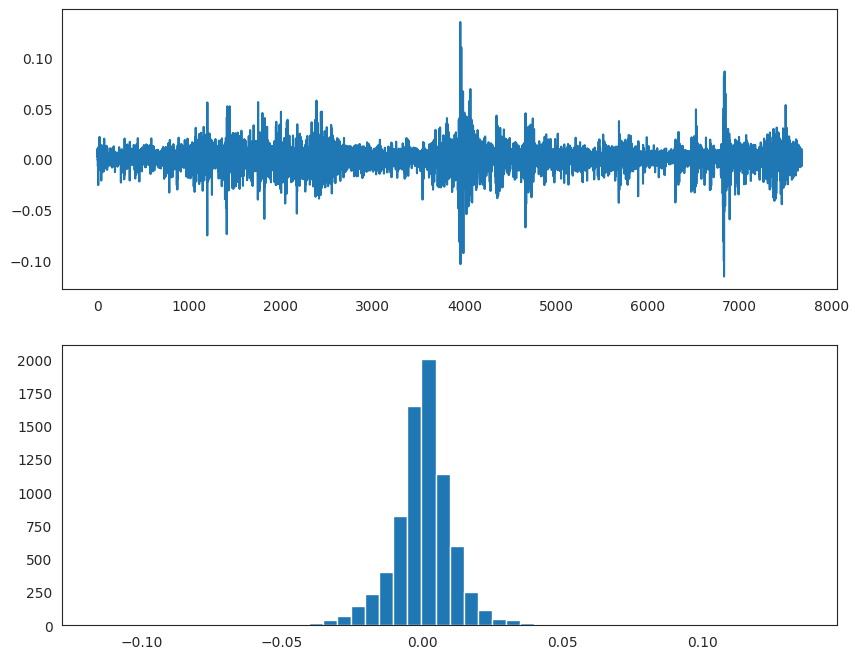

In [9]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(df['log_returns'])
    ax[1].hist(df['log_returns'], bins=50)

In [10]:
df.log_returns.describe()

count    7678.000000
mean        0.000378
std         0.011882
min        -0.115887
25%        -0.004475
50%         0.000673
75%         0.005951
max         0.135578
Name: log_returns, dtype: float64

In [11]:
def realized_volatility_daily(series_log_return):
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

In [12]:
intervals = [7, 30, 60, 180, 365]
vols_df = {}

for i in intervals:
    vols = df.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

vols_df = pd.DataFrame(vols_df, columns=intervals, index=df.index)

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

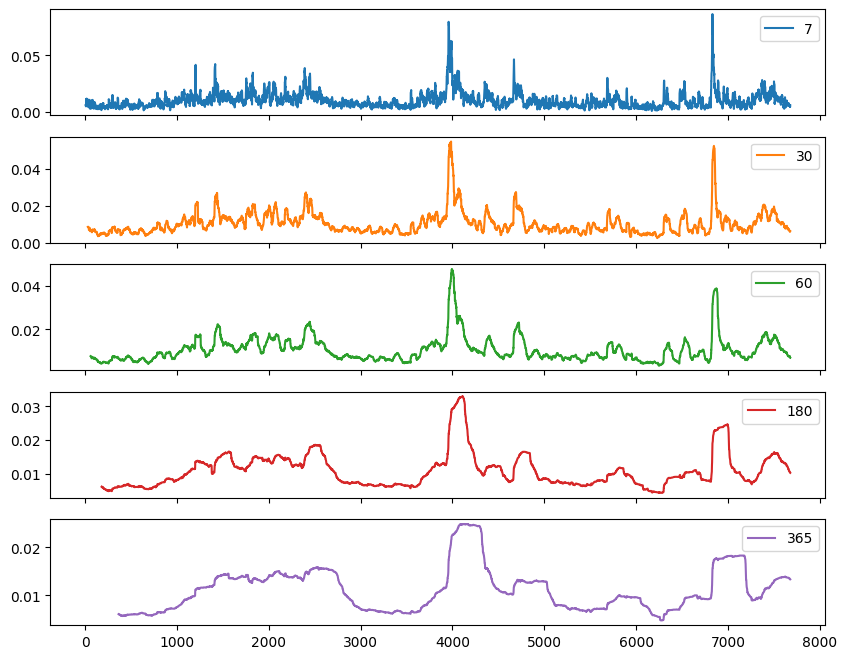

In [13]:
vols_df.plot(subplots=True, figsize=(10, 8))

In [14]:
back_window = 14
forward_window = 7

df['vol_current'] = df.log_returns.rolling(window=back_window).apply(realized_volatility_daily)
df['vol_forward'] = df.log_returns.shift(-forward_window).rolling(window=back_window).apply(realized_volatility_daily)

df.describe()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,log_returns,vol_current,vol_forward
count,7678.000000,7678.000000,7678.000000,7678.000000,7.678000e+03,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7665.000000,7658.000000
mean,138.927114,139.761520,138.013946,138.938468,8.455233e+07,15.730138,2.021229,26.482678,6.510289,2007.819875,0.000378,0.010349,0.010351
std,108.213295,108.833906,107.555882,108.244163,9.294617e+07,8.751507,1.399470,14.916961,3.417474,8.809964,0.011882,0.006727,0.006730
min,24.726739,24.797954,24.388511,24.726746,5.200000e+03,1.000000,0.000000,1.000000,1.000000,1993.000000,-0.115887,0.001547,0.001547
25%,70.915021,71.395808,70.188861,70.723858,9.657200e+06,8.000000,1.000000,14.000000,4.000000,2000.000000,-0.004475,0.006063,0.006061
50%,93.631400,94.246942,92.994316,93.577595,6.249180e+07,16.000000,2.000000,26.000000,6.000000,2008.000000,0.000673,0.008759,0.008769
75%,180.763413,181.597240,180.005181,180.888424,1.170777e+08,23.000000,3.000000,39.000000,9.000000,2015.000000,0.005951,0.012634,0.012636
max,468.038120,468.780396,464.951792,466.563324,8.710263e+08,31.000000,4.000000,53.000000,12.000000,2023.000000,0.135578,0.068484,0.068484


In [15]:
df.dropna(inplace=True)

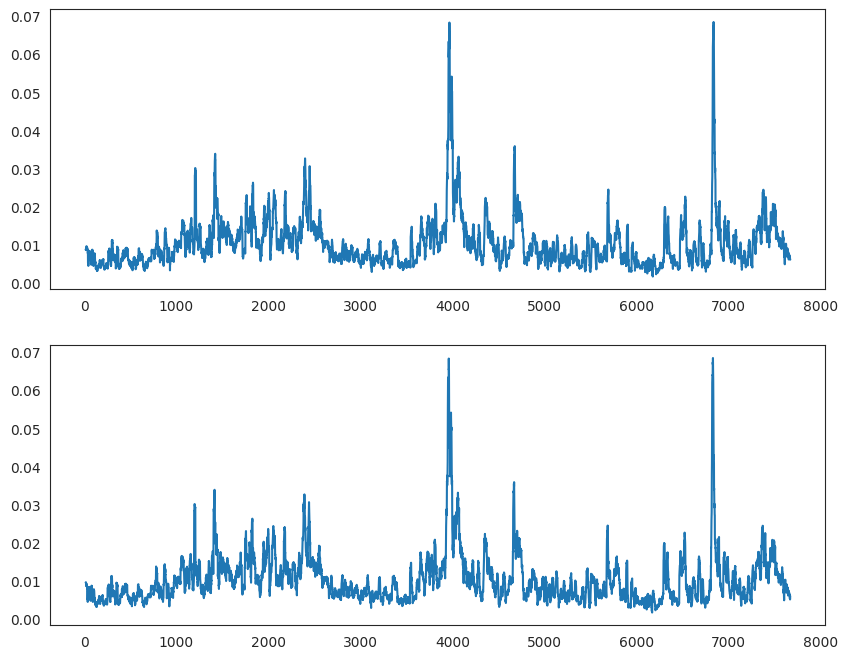

In [16]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(df['vol_current'])
    ax[1].plot(df['vol_forward'])

<AxesSubplot: xlabel='Month'>

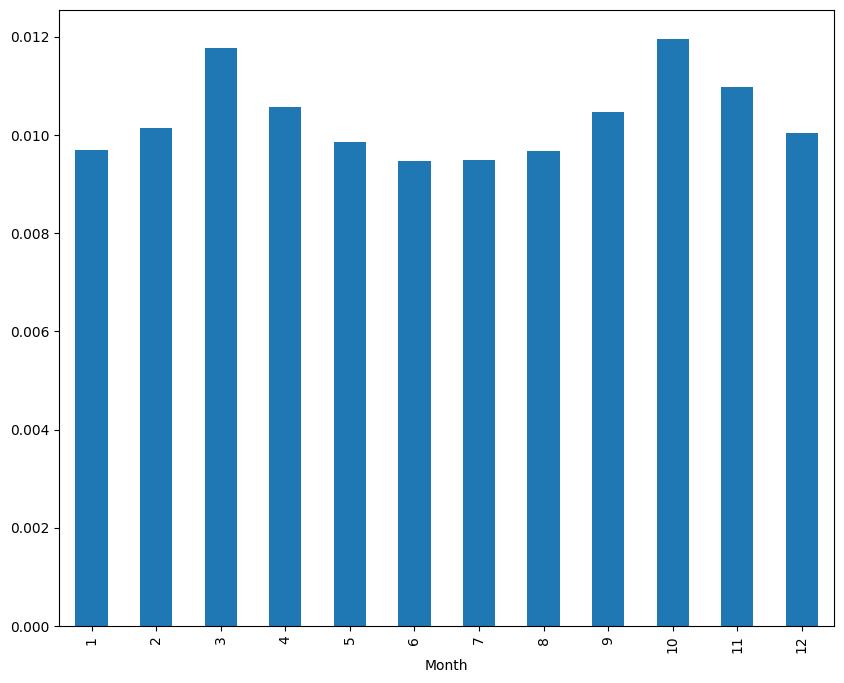

In [17]:
# vol by month
data = df.groupby(df.Month).vol_current.mean()

data.plot(kind='bar', figsize=(10, 8))

<AxesSubplot: xlabel='Week'>

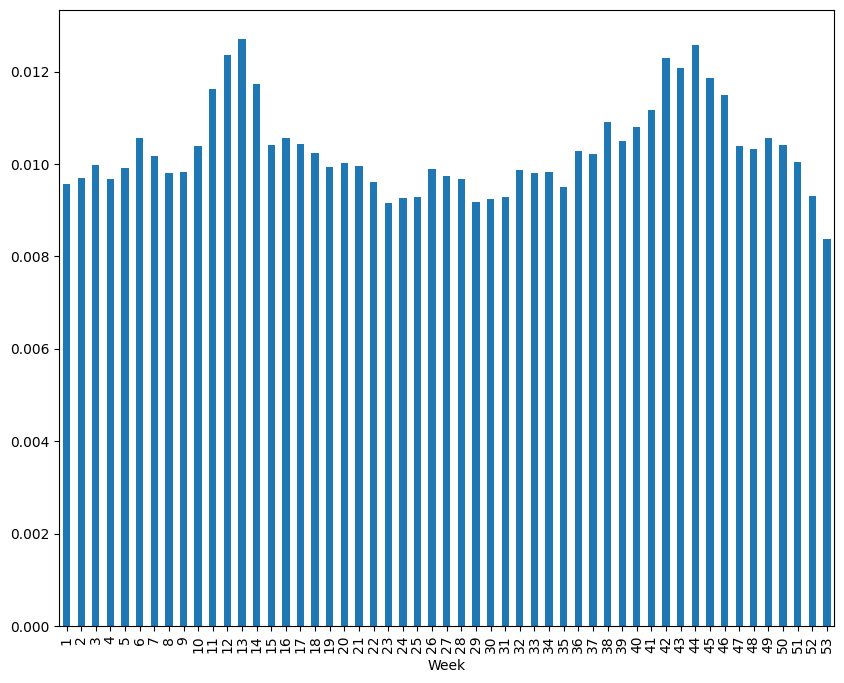

In [18]:
data = df.groupby(df.Week).vol_current.mean()

data.plot(kind='bar', figsize=(10, 8))

<AxesSubplot: xlabel='Year'>

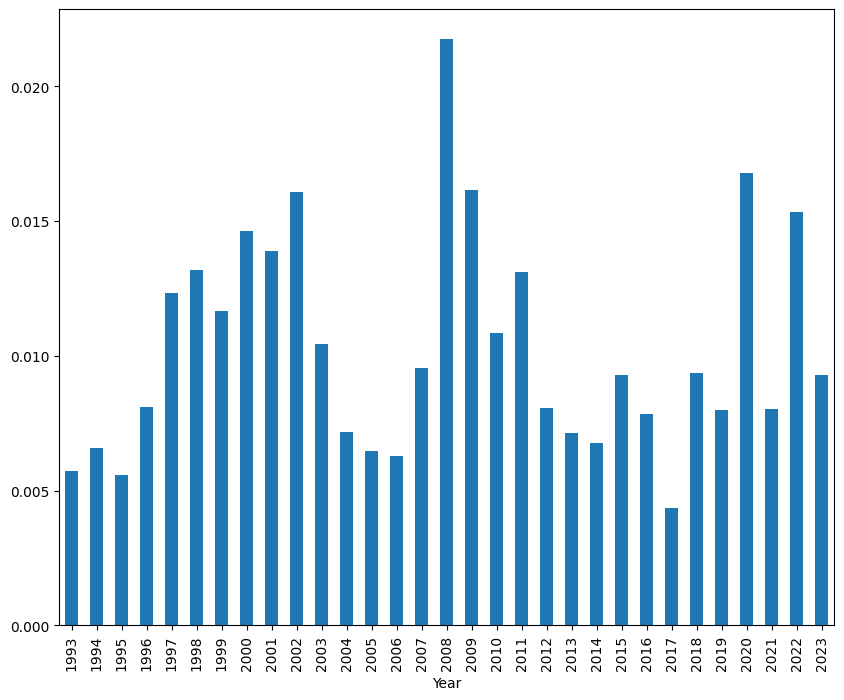

In [19]:
data = df.groupby(df.Year).vol_current.mean()

data.plot(kind='bar', figsize=(10, 8))

C:\Users\Henry\AppData\Local\Temp\ipykernel_48796\2603411341.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vol_current'], norm_hist=True, fit=stats.norm,


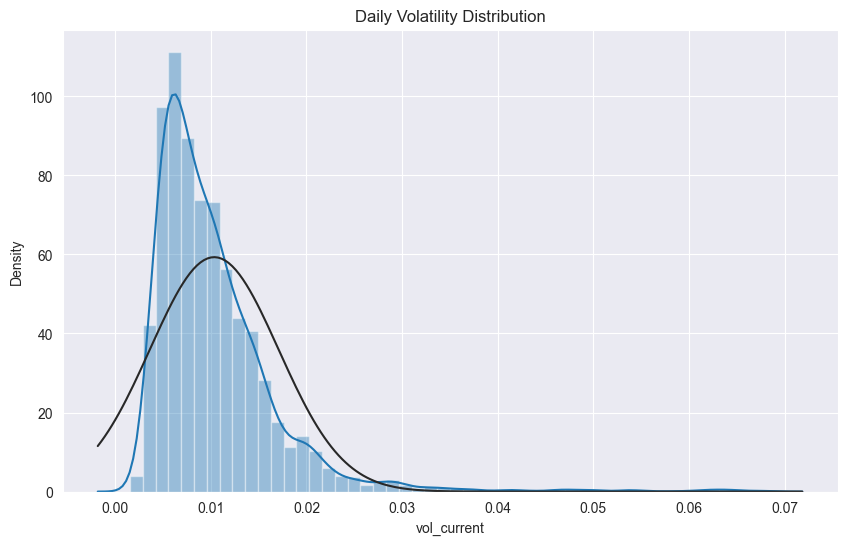

In [20]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df['vol_current'], norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution')
    plt.show()

In [21]:
test_size = 365
val_size = 730

split_time_1 = len(df) - (val_size + test_size)
split_time_2 = len(df) - test_size

train_idx = df.index[:split_time_1]
val_idx = df.index[split_time_1:split_time_2]
test_idx = df.index[split_time_2:]

In [22]:
print(f'TRAINING \tFrom: {df.Date[train_idx[0]]} \tto: {df.Date[train_idx[-1]]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {df.Date[val_idx[0]]} \tto: {df.Date[val_idx[-1]]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {df.Date[test_idx[0]]} \tto: {df.Date[test_idx[-1]]} \t{len(test_idx)} days')

TRAINING 	From: 1993-02-19 	to: 2019-03-13 	6563 days
VALIDATION 	From: 2019-03-14 	to: 2022-02-02 	730 days
TEST 		From: 2022-02-03 	to: 2023-07-19 	365 days


In [23]:
y_train = df.vol_forward[train_idx]
y_val = df.vol_forward[val_idx]
y_test = df.vol_forward[test_idx]

x_train = df.vol_current[train_idx]
x_val = df.vol_current[val_idx]
x_test = df.vol_current[test_idx]

In [24]:
# prepare for GARCH
lr_train = df.log_returns[train_idx]
lr_val = df.log_returns[val_idx]
lr_test = df.log_returns[test_idx]

In [25]:
def transform_volatility_to_scaler(scaler, tf_series):
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [26]:
x_train

14      0.008697
15      0.008530
16      0.008512
17      0.008749
18      0.008692
          ...   
6572    0.005135
6573    0.004200
6574    0.005775
6575    0.005842
6576    0.006042
Name: vol_current, Length: 6563, dtype: float64

In [27]:
scaler_vol = MinMaxScaler()

scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [28]:
# TRANSFORM TRAINING CURRENT & FUTURE VOLATILITIES 
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)

# TRANSFORMING VALIDATION CURRENT & FUTURE VOLATILITIES
x_val_scaled = transform_volatility_to_scaler(scaler_vol, x_val)
y_val_scaled = transform_volatility_to_scaler(scaler_vol, y_val)

# TRANSFORMING TEST CURRENT & FUTURE VOLATILITIES
x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

<AxesSubplot: >

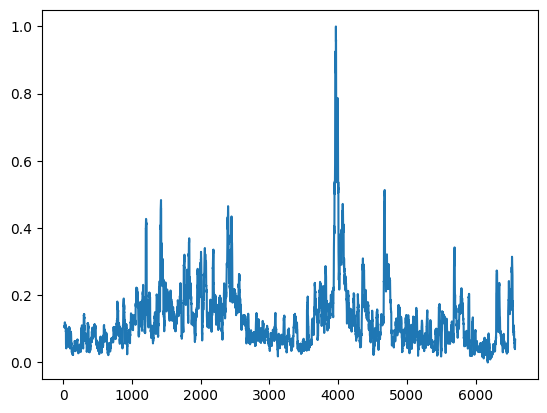

In [29]:
x_train_scaled.plot()

<AxesSubplot: >

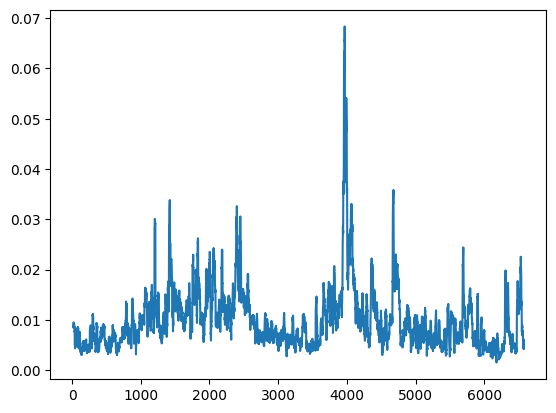

In [30]:
x_train.plot()

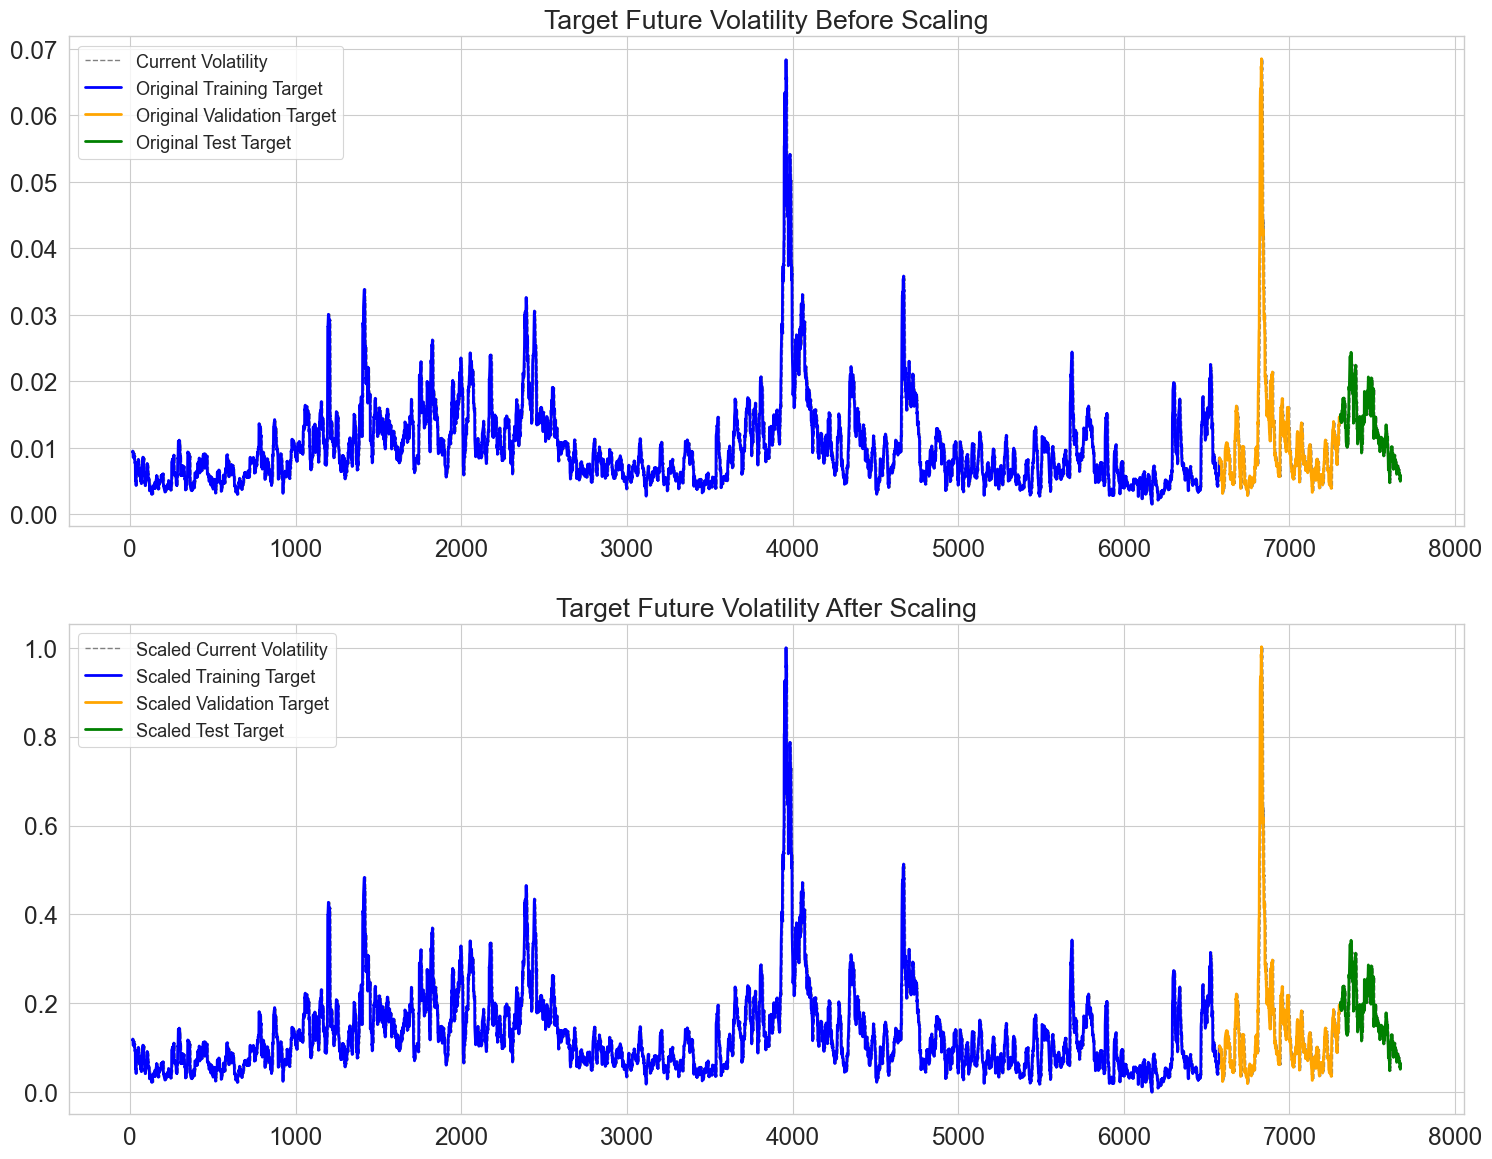

In [31]:
sns.set_context("paper", font_scale=2)

with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df.vol_current), 
                lw=1, color='gray', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.show()

In [32]:
def RMSPE(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

def RMSE(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

performance = pd.DataFrame(columns=['Model', 'RMSPE', 'RMSE'])

def log_performace(y_true, y_pred, model_name):
    performance.loc[len(performance.index)] = [model_name, 
                                       RMSPE(y_true, y_pred), 
                                       RMSE(y_true, y_pred)]
    return performance

In [33]:
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")
        
        plt.plot(y_true, color='blue', lw=2, 
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')
        
        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

# Mean

In [34]:
mean_train_vol = x_train_scaled.mean()
mean_train_vol

0.1283074647955312

In [35]:
baseline_preds = np.ones(len(val_idx)) * mean_train_vol
baseline_preds = pd.Series(baseline_preds, index=lr_val.index)
baseline_preds

6577    0.128307
6578    0.128307
6579    0.128307
6580    0.128307
6581    0.128307
          ...   
7302    0.128307
7303    0.128307
7304    0.128307
7305    0.128307
7306    0.128307
Length: 730, dtype: float64

In [36]:
y_val_scaled

6577    0.103322
6578    0.104559
6579    0.101617
6580    0.102327
6581    0.090216
          ...   
7302    0.183755
7303    0.182006
7304    0.185640
7305    0.182964
7306    0.198237
Length: 730, dtype: float64

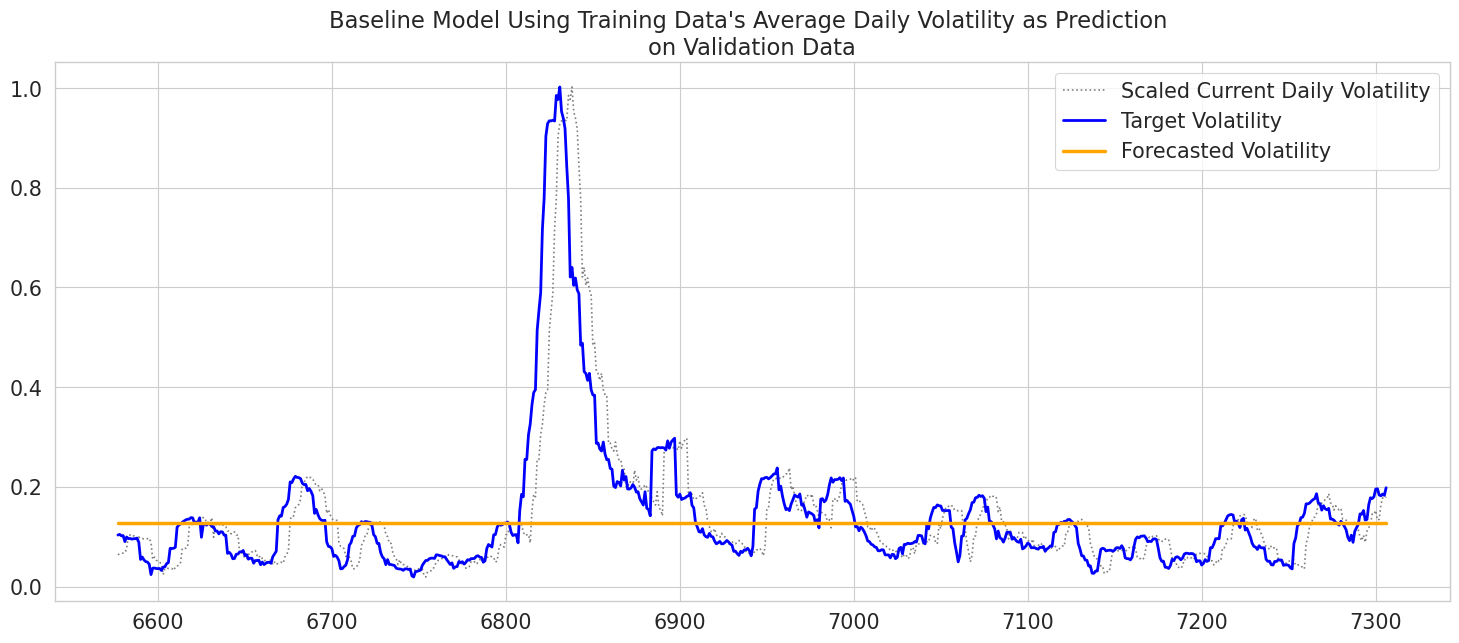

In [37]:
viz_model(y_val_scaled, baseline_preds, 
          f"Baseline Model Using Training Data's Average Daily Volatility as Prediction")
plt.show()

In [38]:
log_performace(y_val_scaled, baseline_preds, 'Mean Baseline')

,Model,RMSPE,RMSE
0,Mean Baseline,1.010889,0.144979


# simple use previous predict future

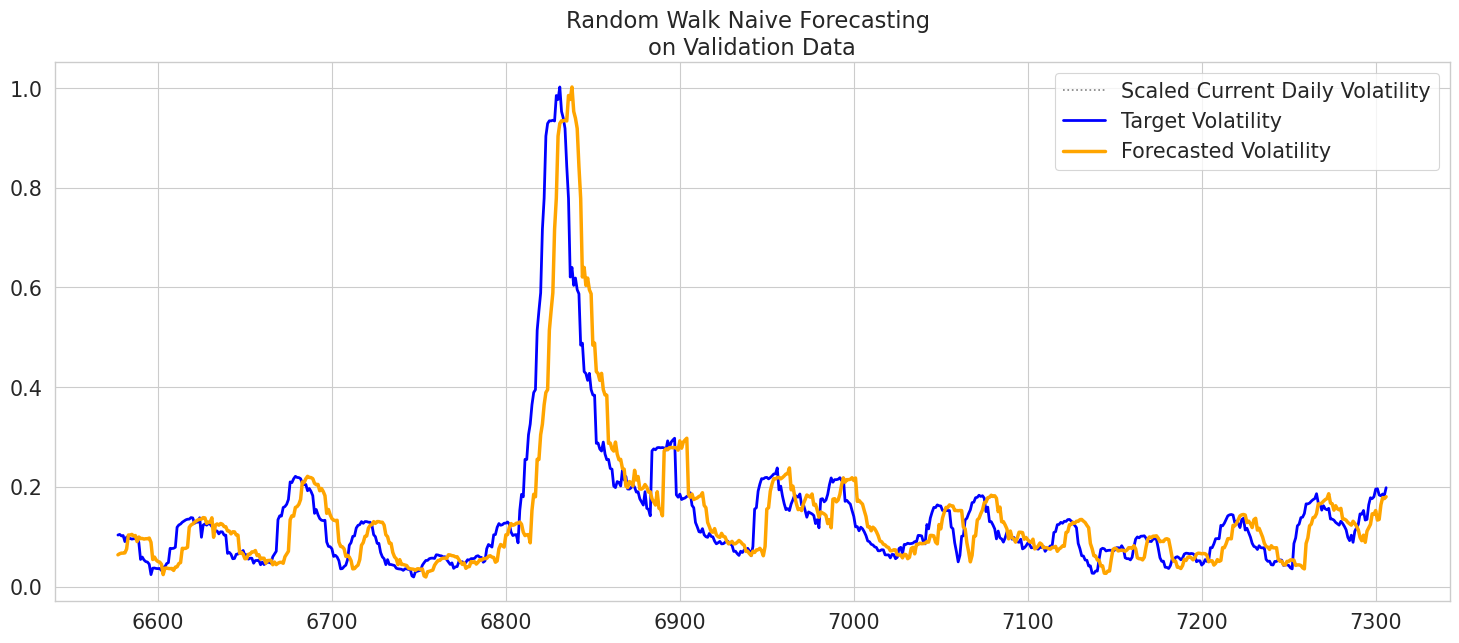

In [39]:
viz_model(y_val_scaled, x_val_scaled, 'Random Walk Naive Forecasting')
plt.show()

In [40]:
log_performace(y_val_scaled, x_val_scaled, 'Random Walk Naive Forecasting')

,Model,RMSPE,RMSE
0,Mean Baseline,1.010889,0.144979
1,Random Walk Naive Forecasting,0.450441,0.076689


# GARCH

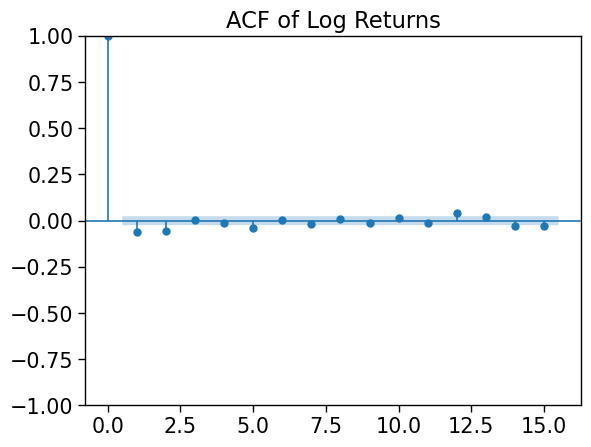

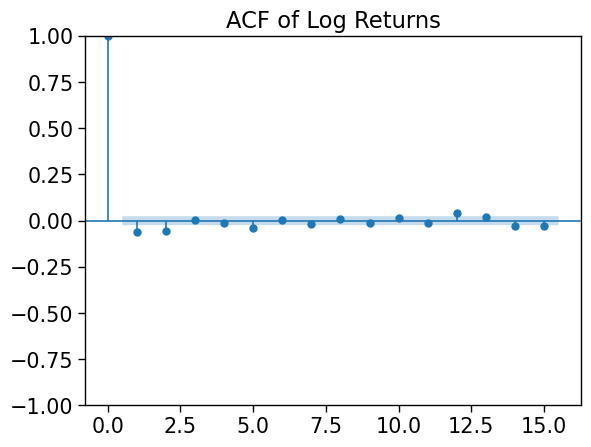

In [41]:
plot_acf(lr_train, lags=15, title='ACF of Log Returns')

d:\Python3.10\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


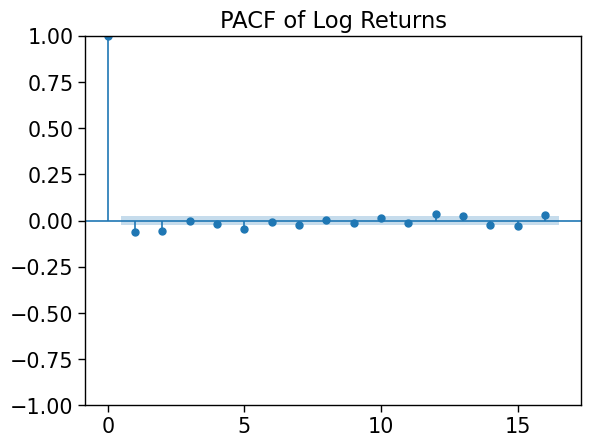

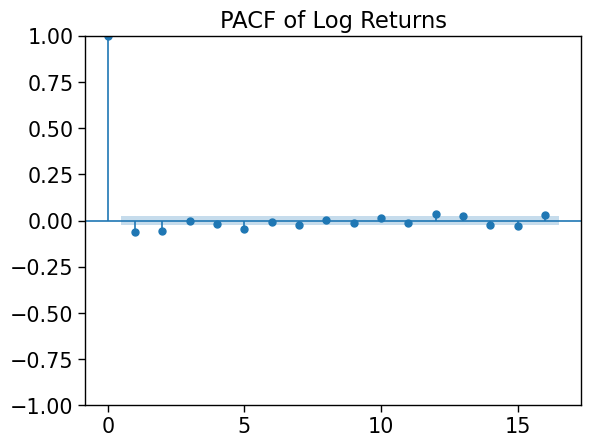

In [42]:
plot_pacf(lr_train, lags=16, title='PACF of Log Returns')

In [43]:
from arch import arch_model

np.random.seed(42)

gm_1 = arch_model(100*lr_train, vol='Garch', p=1, q=1, dist='Normal')
result_1 = gm_1.fit(update_freq=5)
print(result_1.summary())

Iteration:      5,   Func. Count:     36,   Neg. LLF: 8923.951350598722
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8806.346338434028
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8806.314216182267
            Iterations: 14
            Function evaluations: 84
            Gradient evaluations: 14
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8806.31
Distribution:                  Normal   AIC:                           17620.6
Method:            Maximum Likelihood   BIC:                           17647.8
                                        No. Observations:                 6563
Date:                Sat, Dec 02 2023   Df Residuals:                     6562
Time:          

In [44]:
gm12 = arch_model(100*lr_train, vol='Garch', p=12, q=12, dist='Normal')
result_12 = gm12.fit(update_freq=5)
print(result_12.summary())

Iteration:      5,   Func. Count:    144,   Neg. LLF: 10634.60155410644
Iteration:     10,   Func. Count:    288,   Neg. LLF: 15916.442891736413
Iteration:     15,   Func. Count:    433,   Neg. LLF: 8959.089046371115
Iteration:     20,   Func. Count:    577,   Neg. LLF: 8841.384173783164
Iteration:     25,   Func. Count:    717,   Neg. LLF: 8789.61858992388
Iteration:     30,   Func. Count:    855,   Neg. LLF: 8787.567684475898
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8787.567535006028
            Iterations: 33
            Function evaluations: 935
            Gradient evaluations: 33
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8787.57
Distribution:                  Normal   AI

In [45]:
# GARCH(1,1) seems better
result_1.conditional_volatility

14      0.721828
15      0.697166
16      0.674598
17      0.648929
18      0.736179
          ...   
6572    0.620926
6573    0.666293
6574    0.645593
6575    0.762468
6576    0.735074
Name: cond_vol, Length: 6563, dtype: float64

In [46]:
def scale_tf_cond_vol(model_result):
    cond_vol = model_result.conditional_volatility

    scaler = MinMaxScaler()

    scaler = scaler.fit(cond_vol.values.reshape(-1,1))

    scaled_cond_vol = transform_volatility_to_scaler(scaler, cond_vol)
    return scaler, scaled_cond_vol

In [47]:
scalar_garch_1, scaled_cond_vol_1 = scale_tf_cond_vol(result_1)

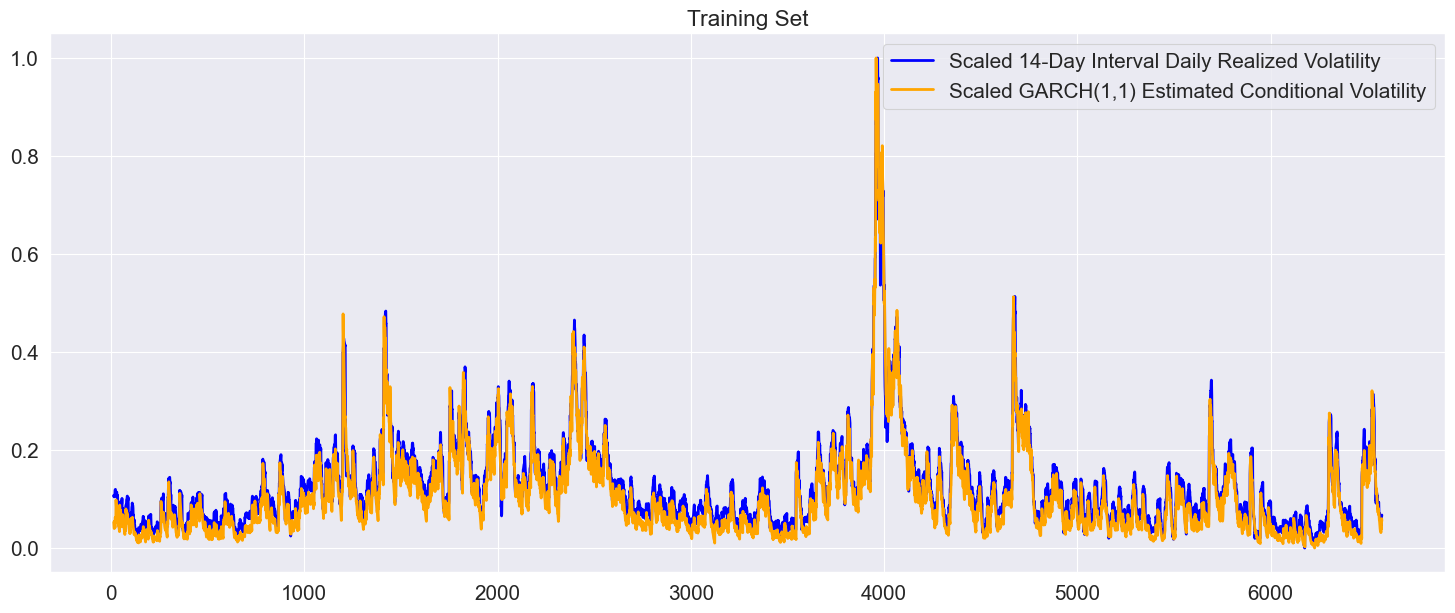

In [48]:
def viz_cond_vol(cond_vol_series, model_name):
    with sns.axes_style("darkgrid"):
        fig, ax = plt.subplots(figsize=(18,7))

        ax.plot(x_train_scaled, color='blue', lw=2,
                label=f'Scaled {14}-Day Interval Daily Realized Volatility')
        ax.plot(cond_vol_series, color='orange', lw=2,
                label=f'Scaled {model_name} Estimated Conditional Volatility')
        ax.set_title('Training Set')
        plt.legend()
        plt.show()

viz_cond_vol(scaled_cond_vol_1, 'GARCH(1,1)')

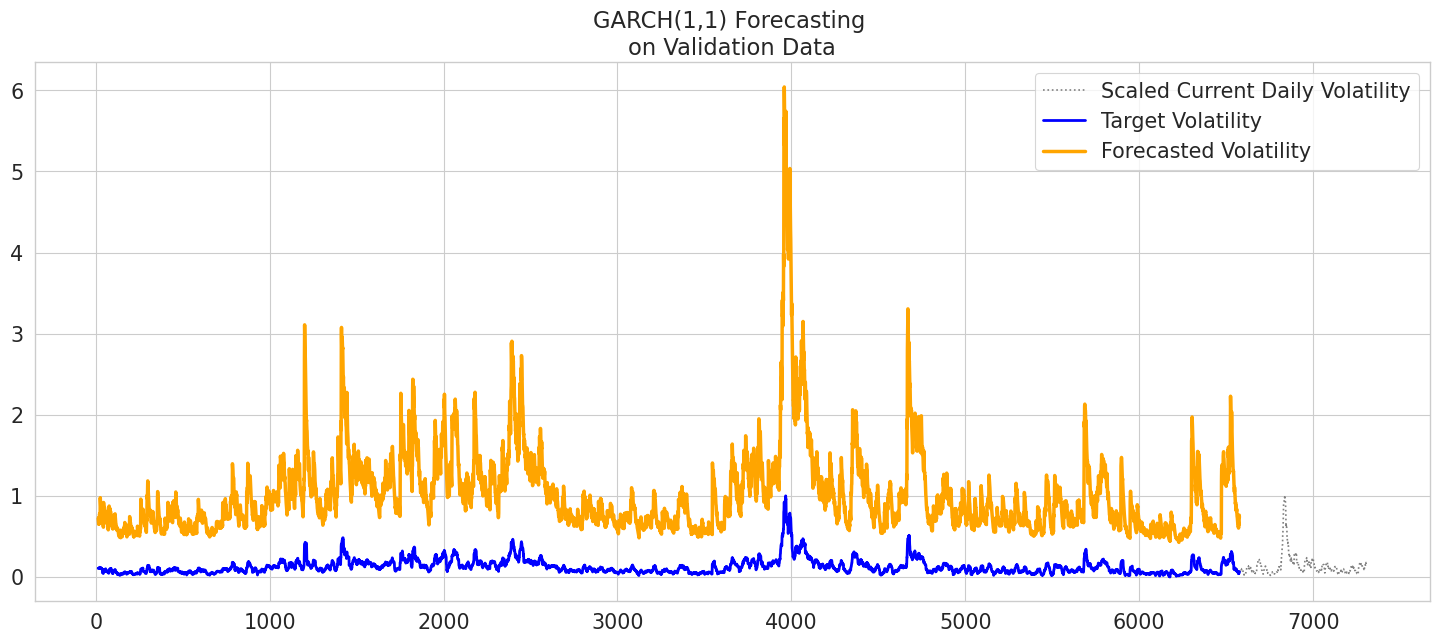

In [49]:
viz_model(x_train_scaled, result_1.conditional_volatility, 'GARCH(1,1) Forecasting')

In [50]:
y_val_scaled

6577    0.103322
6578    0.104559
6579    0.101617
6580    0.102327
6581    0.090216
          ...   
7302    0.183755
7303    0.182006
7304    0.185640
7305    0.182964
7306    0.198237
Length: 730, dtype: float64

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
rolling_forecasts = []
idx = df.index

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(val_idx)):
    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    train = df.log_returns[:idx]
    
    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(train, vol='GARCH', p=1, q=1,
                       dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION n_future DAYS OUT
    vaR = model_fit.forecast(horizon=7, 
                             reindex=False).variance.values
    # GET THE SQRT OF AVERAGE n_future DAYS VARIANCE
    pred = np.sqrt(np.mean(vaR))

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

gm_1_preds = pd.Series(rolling_forecasts, index=val_idx)

d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning:

<AxesSubplot: >

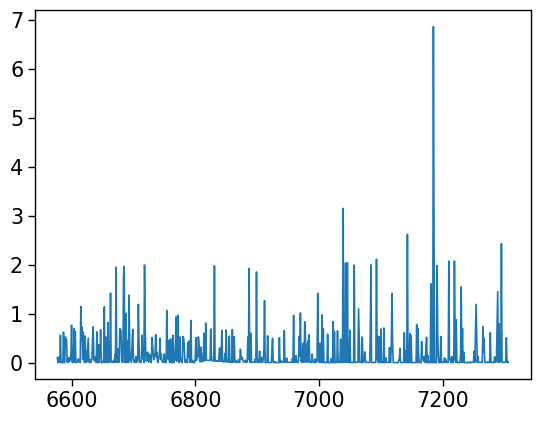

In [53]:
gm_1_preds.plot()

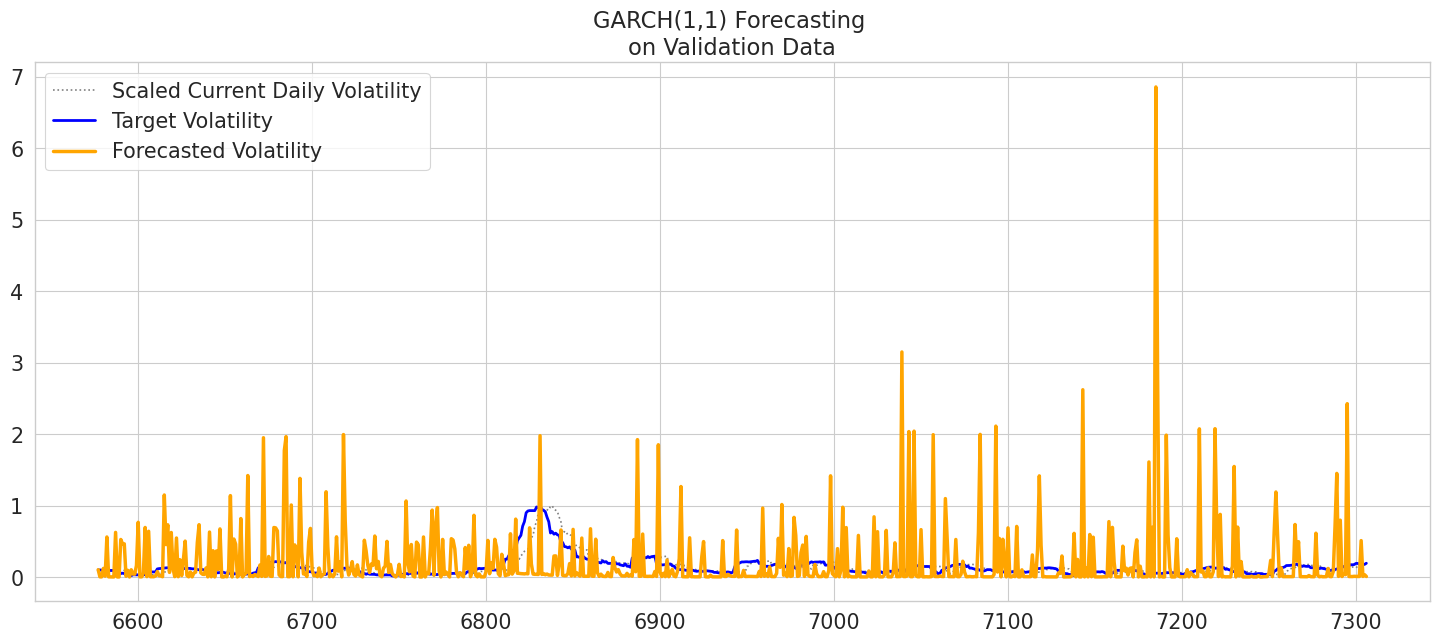

In [54]:
viz_model(y_val_scaled, gm_1_preds, 'GARCH(1,1) Forecasting')

In [55]:
gm_1_preds_scaled = transform_volatility_to_scaler(scalar_garch_1, gm_1_preds)

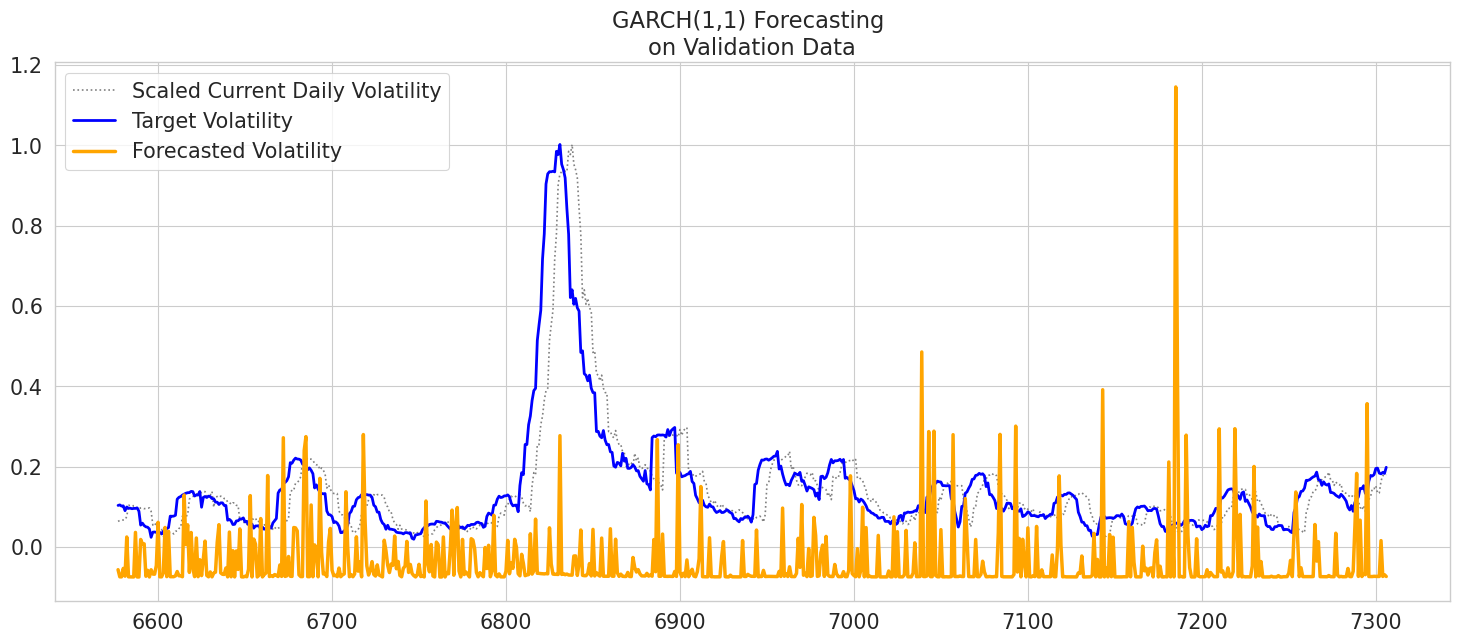

In [56]:
viz_model(y_val_scaled, gm_1_preds_scaled, 'GARCH(1,1) Forecasting')

# GARCH+shock(bad>good)


In [57]:
gjr_garch = arch_model(lr_train, vol='GARCH', p=1, o=1, q=1, dist='skewt')
res = gjr_garch.fit(disp='off')
print(res.summary())

                         Constant Mean - GJR-GARCH Model Results                         
Dep. Variable:                       log_returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GJR-GARCH   Log-Likelihood:           -1.02822e+06
Distribution:      Standardized Skew Student's t   AIC:                       2.05645e+06
Method:                       Maximum Likelihood   BIC:                       2.05649e+06
                                                   No. Observations:                 6563
Date:                           Sat, Dec 02 2023   Df Residuals:                     6562
Time:                                   15:47:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

d:\Python3.10\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [58]:
res.conditional_volatility

14      0.006952
15      0.000007
16      0.000007
17      0.000007
18      0.000007
          ...   
6572    0.000008
6573    0.000008
6574    0.000007
6575    0.000008
6576    0.000008
Name: cond_vol, Length: 6563, dtype: float64

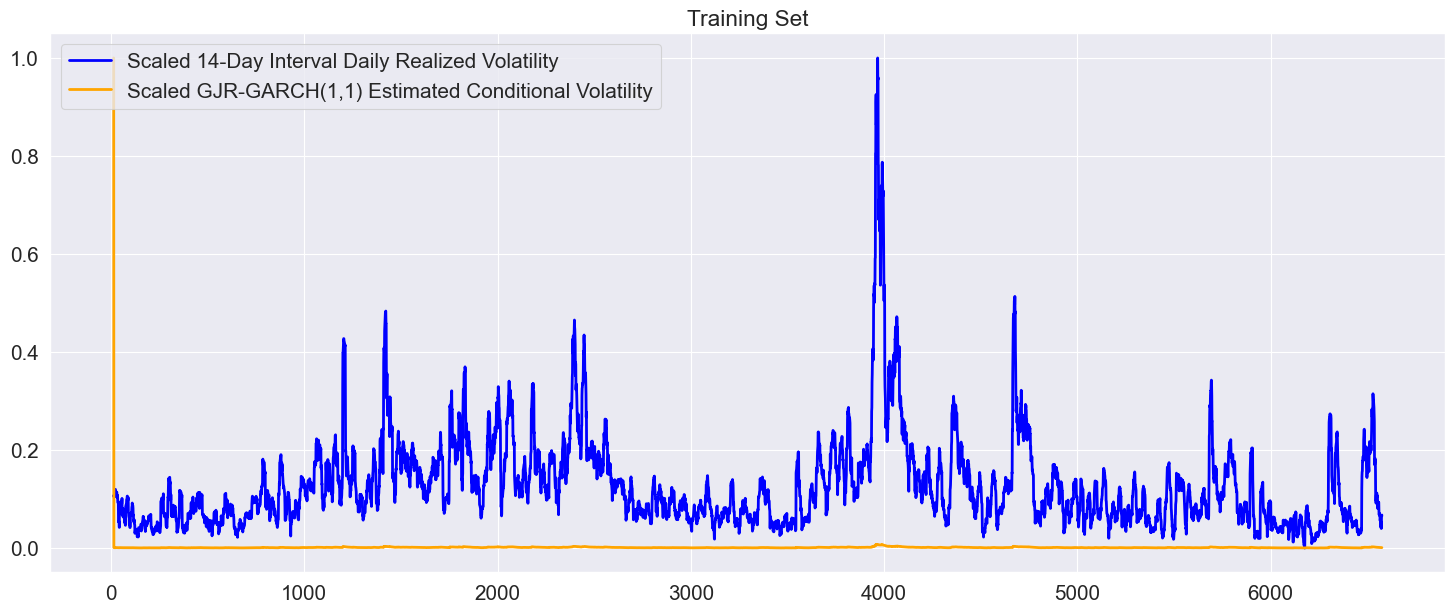

In [59]:
scalar_gjr, scaled_cond_vol_gjr = scale_tf_cond_vol(res)

viz_cond_vol(scaled_cond_vol_gjr, 'GJR-GARCH(1,1)')

# NN

## FCN

In [60]:
# create sequence of rolling forecasts
def windowed_dataset(x, y, window_size):
    X = []
    Y = []
    x1 = x.copy()
    y1 = y.copy()
    x1 = x1.reset_index(drop=True)
    y1 = y1.reset_index(drop=True)
    for i in range(len(x) - window_size):
        X.append(x1[i:i+window_size])
        Y.append(y1[i+window_size])
    return np.array(X), np.array(Y)


In [61]:
def scale(scalar, y_series):
    return pd.Series(scalar.transform(y_series.values.reshape(-1,1))[:,0],
                     index=y_series.index)

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Clearing the session and setting the random seed in PyTorch
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

n_past = 14
batch_size = 64

# Assuming windowed_dataset function is defined elsewhere and works with PyTorch Tensors
mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)
mat_X_val, mat_y_val = windowed_dataset(x_val, y_val, n_past)
mat_X_test, mat_y_test = windowed_dataset(x_test, y_test, n_past)

# Define the model
class SNN1(nn.Module):
    def __init__(self, n_past):
        super(SNN1, self).__init__()
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(n_past, 1)  # Assuming each input has n_past features

    def forward(self, x):
        x = self.flatten(x)
        x = self.dense(x)
        return x

snn_1 = SNN1(n_past)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(snn_1.parameters())

# Print the model summary
def print_model_summary(model):
    print(model)
    for param in model.parameters():
        print(param.shape)

print_model_summary(snn_1)


SNN1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense): Linear(in_features=14, out_features=1, bias=True)
)
torch.Size([1, 14])
torch.Size([1])


In [63]:
from torch.utils.data import DataLoader, TensorDataset, random_split

# Assuming mat_X_train and mat_y_train are NumPy arrays, convert them to PyTorch tensors
mat_X_train = torch.tensor(mat_X_train, dtype=torch.float32)
mat_y_train = torch.tensor(mat_y_train, dtype=torch.float32)

mat_X_val = torch.tensor(mat_X_val, dtype=torch.float32)
mat_y_val = torch.tensor(mat_y_val, dtype=torch.float32)

mat_X_test = torch.tensor(mat_X_test, dtype=torch.float32)
mat_y_test = torch.tensor(mat_y_test, dtype=torch.float32)

# Create a TensorDataset
train_dataset = TensorDataset(mat_X_train, mat_y_train)
val_dataset = TensorDataset(mat_X_val, mat_y_val)
test_dataset = TensorDataset(mat_X_test, mat_y_test)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)       




In [64]:
snn_1 = SNN1(n_past)
criterion = nn.MSELoss()
optimizer = optim.Adam(snn_1.parameters())

# Function to calculate RMSPE
def calculate_rmspe(y_true, y_pred):
    return torch.sqrt(torch.mean(((y_true - y_pred) / y_true) ** 2))

# Function to visualize training and validation metrics
def viz_train_val_metrics(train_loss_history, val_loss_history, train_rmspe_history, val_rmspe_history):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(15,6))
        ln11 = ax.plot(train_loss_history, color='lightblue', label='Training MSE', lw=2)
        ln12 = ax.plot(val_loss_history, color='darkblue', label='Validation MSE', lw=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')
        ax2 = ax.twinx()
        ln21 = ax2.plot(train_rmspe_history, color='pink', lw=2, label='Training RMSPE')
        ln22 = ax2.plot(val_rmspe_history, color='red', lw=2, label='Validation RMSPE')
        ax2.set_ylabel('RMSPE')
        lns = ln11 + ln12 + ln21 + ln22
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')
        ax.set_title('Training vs. Validation Learning Curves')
        plt.show()

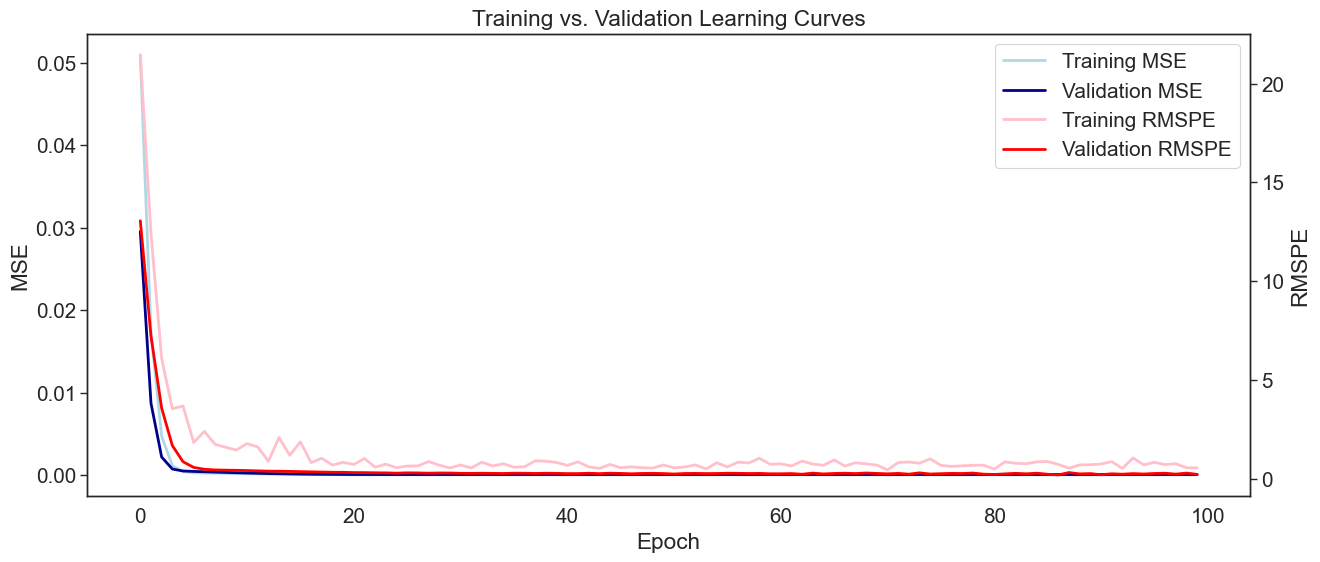

In [65]:
train_loss_history = []
val_loss_history = []
train_rmspe_history = []
val_rmspe_history = []

# Training loop
for epoch in range(100):  # Assuming 100 epochs
    snn_1.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = snn_1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_rmspe = calculate_rmspe(targets, outputs)
    train_rmspe_history.append(train_rmspe.item())

    # Validation loop
    snn_1.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = snn_1(inputs)
            val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    val_rmspe = calculate_rmspe(targets, outputs)
    val_rmspe_history.append(val_rmspe.item())

# Visualization
viz_train_val_metrics(train_loss_history, val_loss_history, train_rmspe_history, val_rmspe_history)

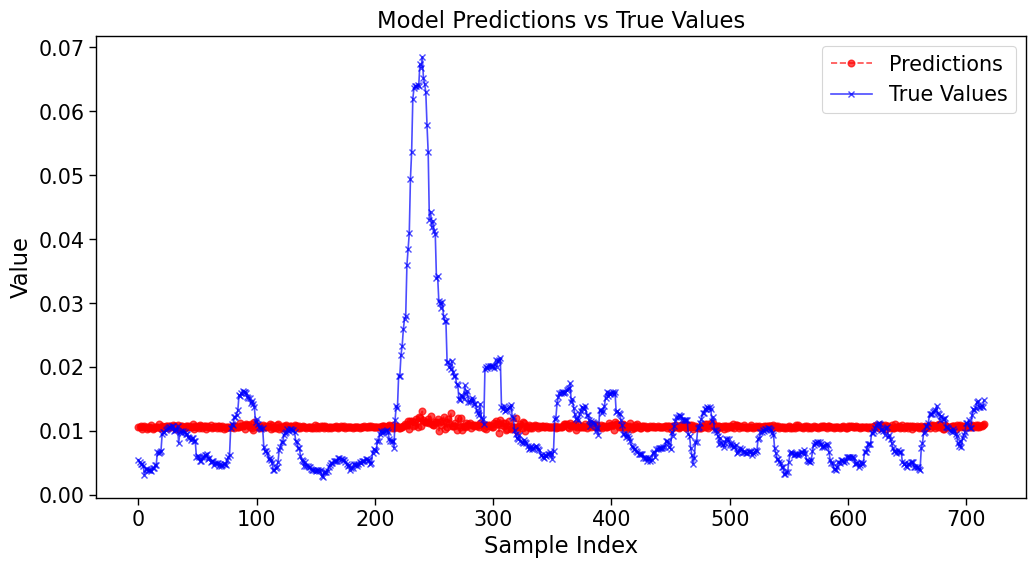

In [66]:
snn_1.eval()  # Set the model to evaluation mode
val_loss = 0
all_snn_1_results = []
all_snn_1_targets = []

with torch.no_grad():  # Disable gradient computation
    for inputs, targets in val_loader:
        outputs = snn_1(inputs)

        all_snn_1_results.append(outputs.flatten().numpy())
        all_snn_1_targets.append(targets.flatten().numpy())

        val_loss += criterion(outputs, targets).item()

val_loss /= len(val_loader)  # Calculate average validation loss

all_snn_1_results = np.concatenate(all_snn_1_results)
all_snn_1_targets = np.concatenate(all_snn_1_targets)

plt.figure(figsize=(12, 6))  # Larger figure size for better visibility

# Plotting with different styles
plt.plot(all_snn_1_results, label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(all_snn_1_targets, label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')

plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()




In [67]:
all_snn_1_results

array([0.01070798, 0.01059275, 0.01077434, 0.01032254, 0.01064908,
       0.01078654, 0.01070781, 0.01037562, 0.01069569, 0.01052296,
       0.01061093, 0.01091204, 0.01033826, 0.01048352, 0.01060779,
       0.01067656, 0.01060864, 0.01103841, 0.010477  , 0.01044418,
       0.01071507, 0.01068903, 0.01059025, 0.01083247, 0.0107584 ,
       0.01053376, 0.01072679, 0.01071741, 0.01066551, 0.01098446,
       0.01080687, 0.01073123, 0.01029339, 0.01094296, 0.01065506,
       0.01065387, 0.01076366, 0.0107742 , 0.01042993, 0.01050341,
       0.01084856, 0.01080256, 0.0105536 , 0.01075158, 0.01065764,
       0.01067822, 0.01116176, 0.01025757, 0.01086074, 0.01070666,
       0.01074638, 0.01052449, 0.01090652, 0.01081471, 0.01040298,
       0.01074964, 0.01074113, 0.01031763, 0.01072274, 0.01060368,
       0.0106107 , 0.01094675, 0.01044305, 0.01067746, 0.01062206,
       0.01078911, 0.01054403, 0.01081968, 0.01082233, 0.01041084,
       0.01067339, 0.01076193, 0.01038425, 0.01068642, 0.01052

In [68]:
all_snn_1_targets

array([0.00549561, 0.00509829, 0.00488989, 0.00482407, 0.00453103,
       0.00314572, 0.0040051 , 0.0040287 , 0.00396478, 0.00394798,
       0.00396619, 0.00370405, 0.00414809, 0.00419048, 0.00462175,
       0.0047577 , 0.00666475, 0.00664122, 0.00667192, 0.00681094,
       0.00948969, 0.00979334, 0.00992492, 0.01016764, 0.0103164 ,
       0.01047824, 0.01056464, 0.01058208, 0.0107846 , 0.01074218,
       0.01001471, 0.01018006, 0.01017346, 0.01075762, 0.00814838,
       0.00977925, 0.00993642, 0.00976866, 0.00999085, 0.00990174,
       0.00958394, 0.00955845, 0.00900239, 0.00898566, 0.00860448,
       0.00888236, 0.00887215, 0.00845645, 0.00843656, 0.00598485,
       0.00612934, 0.00586634, 0.00526791, 0.00530704, 0.00586882,
       0.00589266, 0.00618847, 0.00618893, 0.00637394, 0.00569206,
       0.00581002, 0.00521757, 0.00534744, 0.00533744, 0.00467098,
       0.00503272, 0.00503904, 0.00507467, 0.00446456, 0.00482872,
       0.0044866 , 0.00466837, 0.00478417, 0.00479838, 0.00466

In [69]:
x_train 

14      0.008697
15      0.008530
16      0.008512
17      0.008749
18      0.008692
          ...   
6572    0.005135
6573    0.004200
6574    0.005775
6575    0.005842
6576    0.006042
Name: vol_current, Length: 6563, dtype: float64

In [70]:
y_train

14      0.009444
15      0.009506
16      0.009535
17      0.009326
18      0.008621
          ...   
6572    0.006024
6573    0.006023
6574    0.006059
6575    0.006591
6576    0.008454
Name: vol_forward, Length: 6563, dtype: float64

In [71]:
x_val 

6577    0.005796
6578    0.005943
6579    0.006024
6580    0.006023
6581    0.006059
          ...   
7302    0.010540
7303    0.012497
7304    0.013438
7305    0.013332
7306    0.013578
Name: vol_current, Length: 730, dtype: float64

In [72]:
y_val

6577    0.008448
6578    0.008531
6579    0.008334
6580    0.008381
6581    0.007573
          ...   
7302    0.013820
7303    0.013703
7304    0.013946
7305    0.013767
7306    0.014787
Name: vol_forward, Length: 730, dtype: float64

In [73]:
n_past = 10

In [74]:
scalar = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scalar.fit_transform(x_train.values.reshape(-1,1))
y_train_scaled = scalar.transform(y_train.values.reshape(-1,1))
x_val_scaled = scalar.transform(x_val.values.reshape(-1,1))
y_val_scaled = scalar.transform(y_val.values.reshape(-1,1))
x_test_scaled = scalar.transform(x_test.values.reshape(-1,1))
y_test_scaled = scalar.transform(y_test.values.reshape(-1,1))

In [75]:
x_train_scaled

array([[0.10705715],
       [0.10455609],
       [0.10428788],
       ...,
       [0.06330691],
       [0.06430921],
       [0.06729818]])

In [76]:
def windowed_dataset(x, y, window_size):
    X = []
    Y = []
    for i in range(len(x) - window_size):
        X.append(x[i:i+window_size])
        Y.append(y[i+window_size])
    return np.array(X), np.array(Y)

In [77]:
mat_X_train, mat_y_train = windowed_dataset(x_train_scaled, y_train_scaled, n_past)
mat_X_val, mat_y_val = windowed_dataset(x_val_scaled, y_val_scaled, n_past)
mat_X_test, mat_y_test = windowed_dataset(x_test_scaled, y_test_scaled, n_past)

In [78]:
mat_X_train.shape

(6553, 10, 1)

In [79]:
mat_X_train = torch.tensor(mat_X_train, dtype=torch.float32)
mat_y_train = torch.tensor(mat_y_train, dtype=torch.float32)
mat_X_val = torch.tensor(mat_X_val, dtype=torch.float32)
mat_y_val = torch.tensor(mat_y_val, dtype=torch.float32)
mat_X_test = torch.tensor(mat_X_test, dtype=torch.float32)
mat_y_test = torch.tensor(mat_y_test, dtype=torch.float32)

train_dataset = TensorDataset(mat_X_train, mat_y_train)
val_dataset = TensorDataset(mat_X_val, mat_y_val)
test_dataset = TensorDataset(mat_X_test, mat_y_test)

In [80]:
mat_X_train.shape[1]

10

In [81]:
batch_size = 1

In [82]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [83]:
class LSTM1(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM1, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

100%|██████████| 24/24 [00:50<00:00,  2.11s/it]


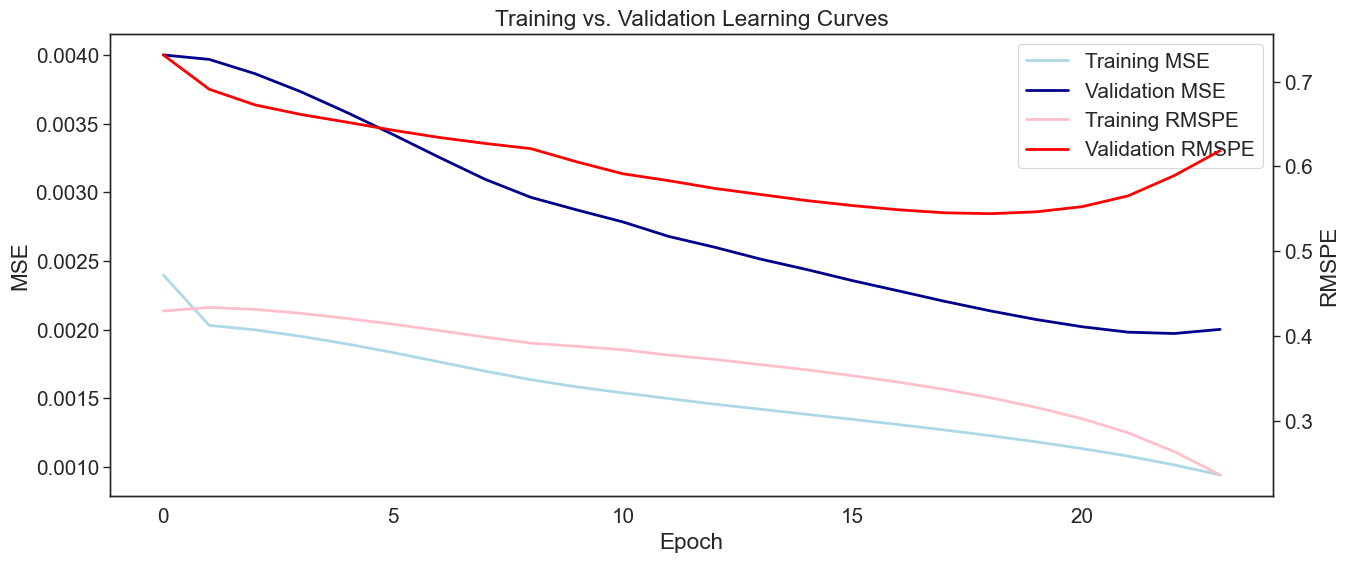

In [84]:
from tqdm import trange

lstm_1 = LSTM1(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_1.parameters(), lr=0.0001)

epochs = 24
train_loss_history = []
val_loss_history = []
train_rmspe_history = []
val_rmspe_history = []

for epoch in trange(epochs):
    lstm_1.train()
    train_loss = 0
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        optimizer.zero_grad()
        outputs = lstm_1(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_rmspe = calculate_rmspe(targets, outputs)
    train_rmspe_history.append(train_rmspe.item())

    lstm_1.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            #inputs = inputs.unsqueeze(2)
            outputs = lstm_1(inputs)
            outputs = outputs.squeeze(1)
            val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    val_rmspe = calculate_rmspe(targets, outputs)
    val_rmspe_history.append(val_rmspe.item())

viz_train_val_metrics(train_loss_history, val_loss_history, train_rmspe_history, val_rmspe_history)

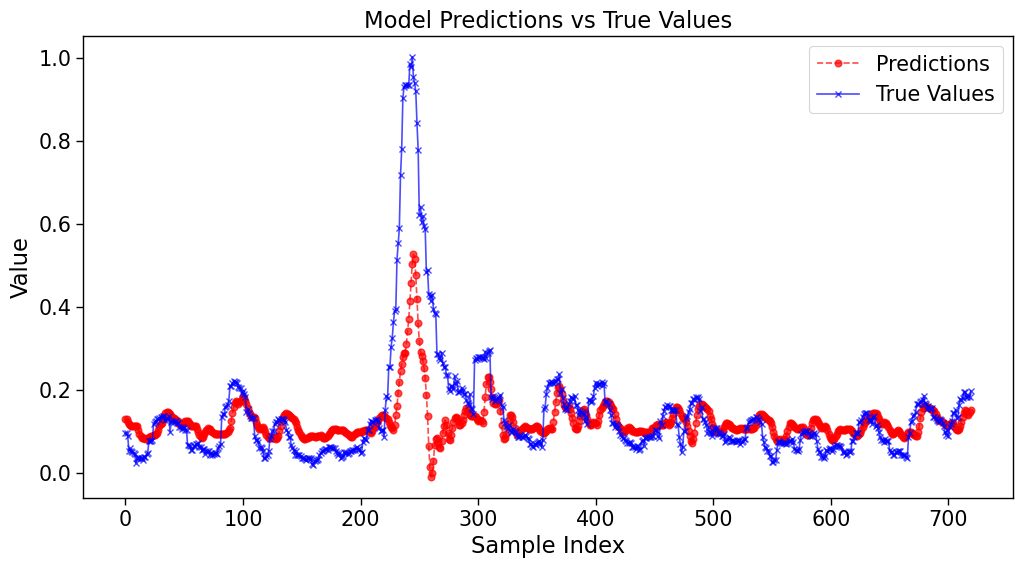

In [85]:
lstm_1.eval()
val_loss = 0

all_lstm_1_results = []
all_lstm_1_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_1(inputs)
        all_lstm_1_results.append(outputs.flatten().numpy())
        all_lstm_1_targets.append(targets.flatten().numpy())


plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_1_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_1_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()



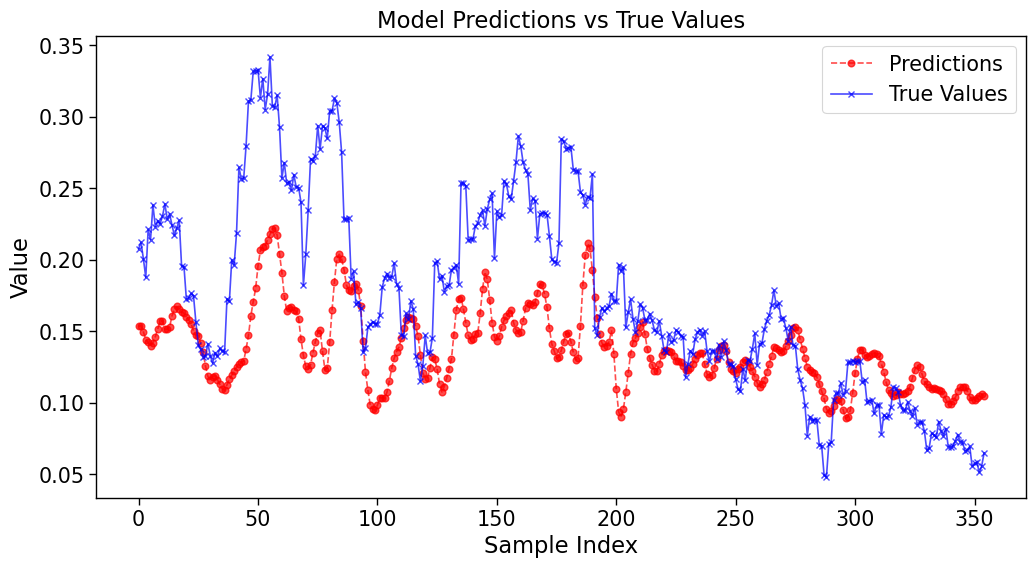

In [86]:
lstm_1.eval()
val_loss = 0

all_lstm_1_results = []
all_lstm_1_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_1(inputs)
        all_lstm_1_results.append(outputs.flatten().numpy())
        all_lstm_1_targets.append(targets.flatten().numpy())


plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_1_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_1_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

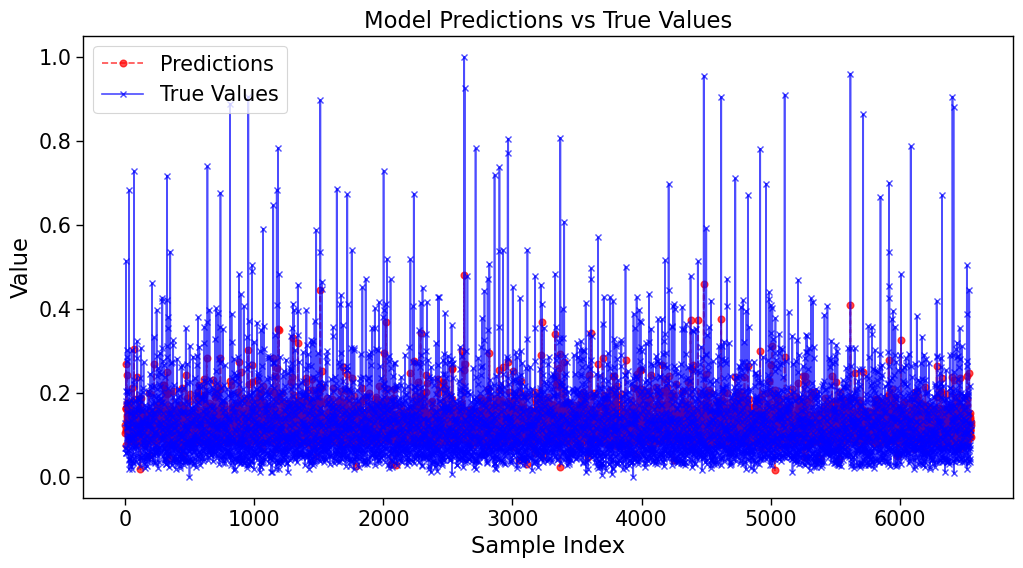

In [87]:
lstm_1.eval()
val_loss = 0

all_lstm_1_results = []
all_lstm_1_targets = []

with torch.no_grad():
    for inputs, targets in train_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_1(inputs)
        all_lstm_1_results.append(outputs.flatten().numpy())
        all_lstm_1_targets.append(targets.flatten().numpy())


plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_1_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_1_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

In [88]:
class LSTM2(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM2, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # Batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        # Bidirectional set to True
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)

        # Readout layer - hidden_dim is doubled for bidirectional
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Concatenate the hidden state from the last time step of both directions
        out = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim = 1)
        
        out = self.fc(out) 
        return out


100%|██████████| 24/24 [01:29<00:00,  3.74s/it]


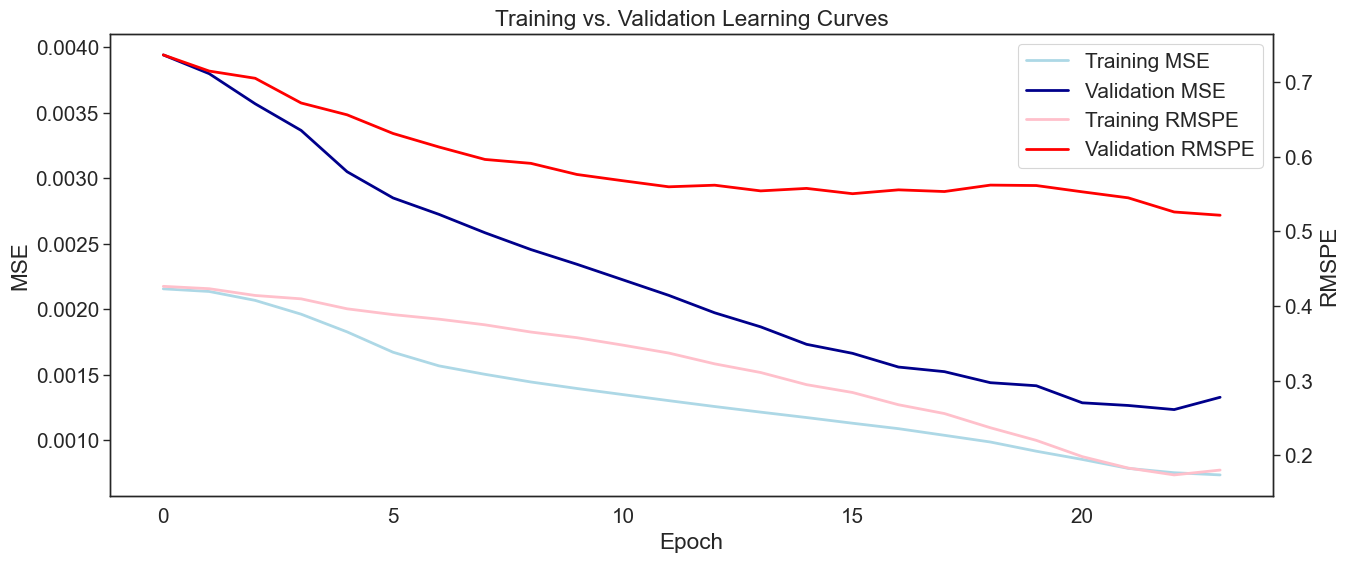

In [89]:
from tqdm import trange

lstm_2 = LSTM2(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_2.parameters(), lr=0.0001)

epochs = 24
train_loss_history = []
val_loss_history = []
train_rmspe_history = []
val_rmspe_history = []

for epoch in trange(epochs):
    lstm_2.train()
    train_loss = 0
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        optimizer.zero_grad()
        outputs = lstm_2(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_rmspe = calculate_rmspe(targets, outputs)
    train_rmspe_history.append(train_rmspe.item())

    lstm_2.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            #inputs = inputs.unsqueeze(2)
            outputs = lstm_2(inputs)
            outputs = outputs.squeeze(1)
            val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    val_rmspe = calculate_rmspe(targets, outputs)
    val_rmspe_history.append(val_rmspe.item())

viz_train_val_metrics(train_loss_history, val_loss_history, train_rmspe_history, val_rmspe_history)

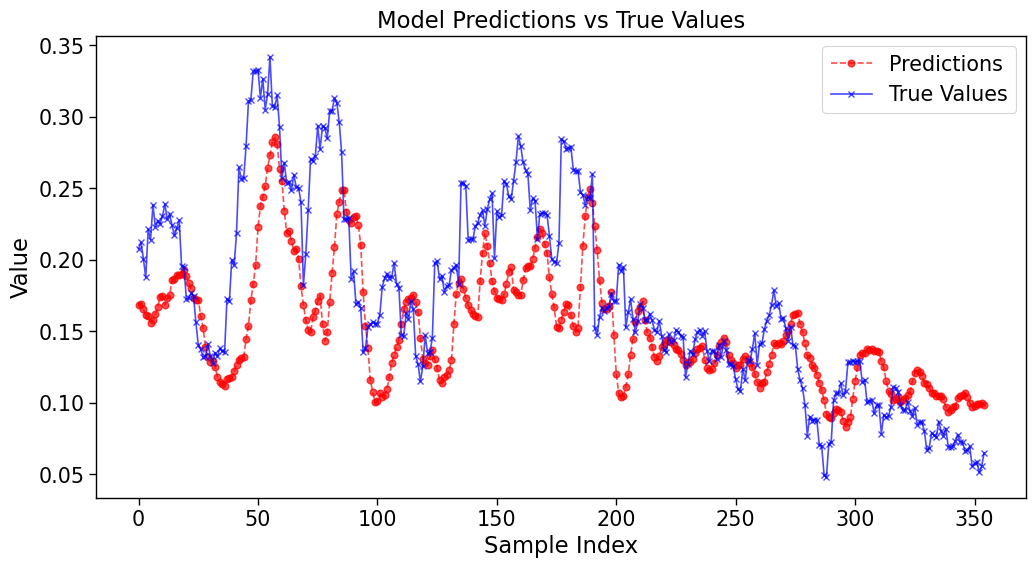

In [90]:
lstm_2.eval()

all_lstm_2_results = []
all_lstm_2_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_2(inputs)
        all_lstm_2_results.append(outputs.flatten().numpy())
        all_lstm_2_targets.append(targets.flatten().numpy())

plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_2_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_2_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


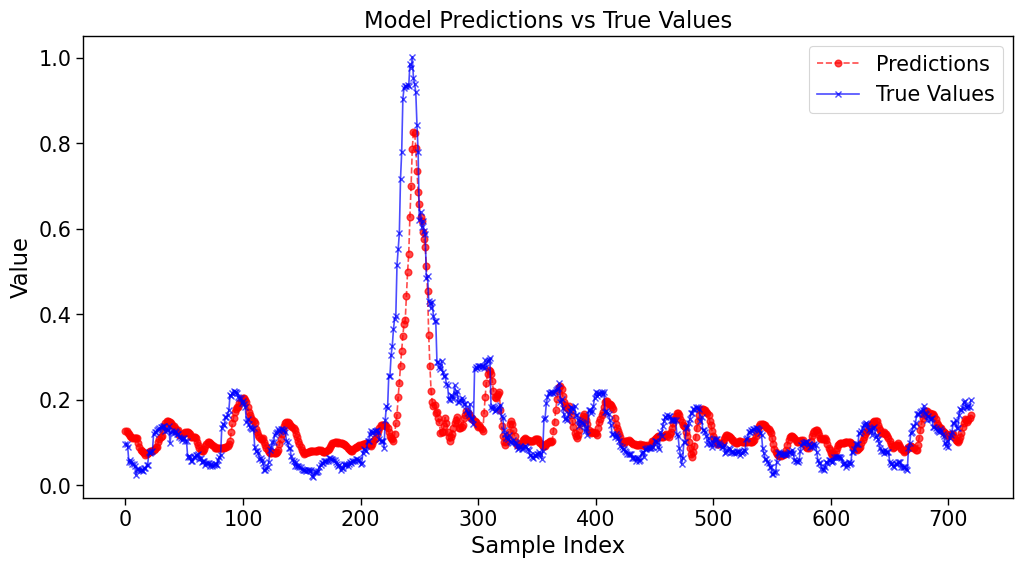

In [91]:
lstm_2.eval()

all_lstm_2_results = []
all_lstm_2_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_2(inputs)
        all_lstm_2_results.append(outputs.flatten().numpy())
        all_lstm_2_targets.append(targets.flatten().numpy())

plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_2_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_2_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

In [92]:
import torch
import torch.nn as nn

class LSTM3(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM3, self).__init__()

        # Conv1D layer
        self.conv1d = nn.Conv1d(in_channels=input_dim, out_channels=32, kernel_size=4, stride=2)

        # First Bidirectional LSTM layer
        self.lstm1 = nn.LSTM(input_size=32, hidden_size=hidden_dim, num_layers=1, batch_first=True, bidirectional=True)

        # Second Bidirectional LSTM layer
        # Hidden state size is halved since the LSTM is bidirectional
        self.lstm2 = nn.LSTM(input_size=hidden_dim * 2, hidden_size=hidden_dim // 2, num_layers=1, batch_first=True, bidirectional=True)

        # Dense Output Layer
        self.fc = nn.Linear(hidden_dim, output_dim)  # Adjust hidden_dim accordingly

    def forward(self, x):
        # Adjust input dimensions for Conv1d
        x = x.transpose(1, 2)  # Conv1D expects (batch, channels, length)

        # Conv1D layer
        x = torch.relu(self.conv1d(x))

        # Adjust output dimensions for LSTM
        x = x.transpose(1, 2)  # LSTM expects (batch, seq_len, features)

        # First Bidirectional LSTM layer
        x, _ = self.lstm1(x)

        # Second Bidirectional LSTM layer
        x, _ = self.lstm2(x)

        # We only use the last hidden state of the last layer
        x = x[:, -1, :]

        # Dense Output Layer
        x = self.fc(x)

        return x


100%|██████████| 24/24 [01:24<00:00,  3.53s/it]


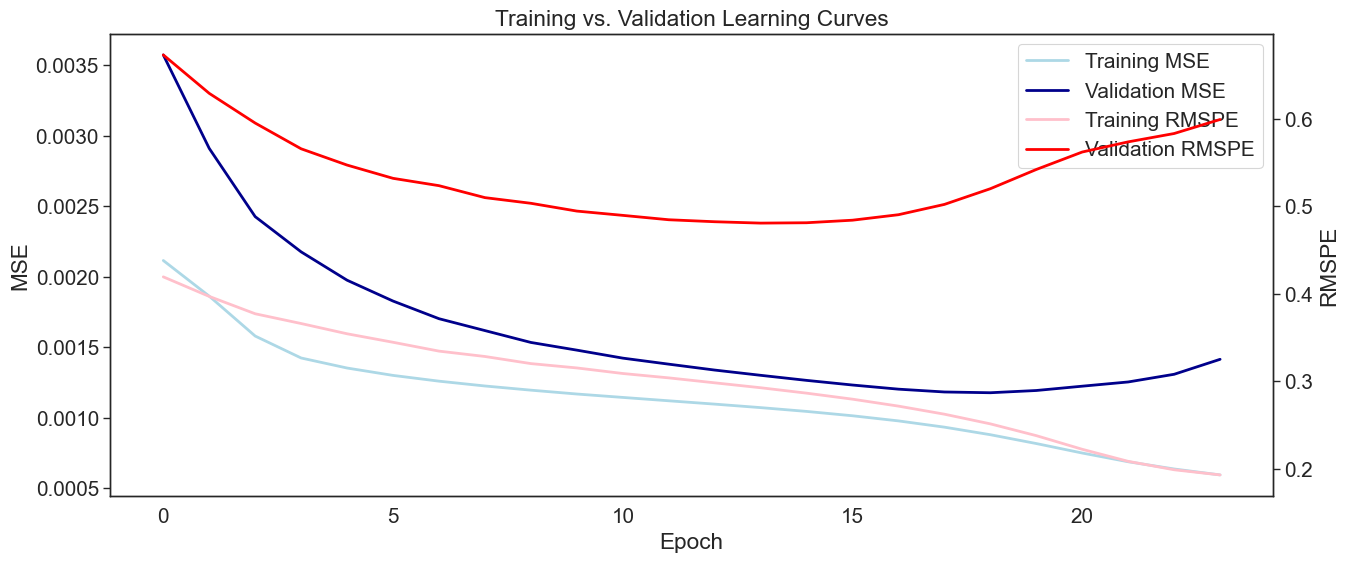

In [93]:
lstm_3 = LSTM3(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_3.parameters(), lr=0.0001)

epochs = 24
train_loss_history = []
val_loss_history = []
train_rmspe_history = []
val_rmspe_history = []

for epoch in trange(epochs):
    lstm_3.train()
    train_loss = 0
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        optimizer.zero_grad()
        outputs = lstm_3(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_rmspe = calculate_rmspe(targets, outputs)
    train_rmspe_history.append(train_rmspe.item())

    lstm_3.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            #inputs = inputs.unsqueeze(2)
            outputs = lstm_3(inputs)
            outputs = outputs.squeeze(1)
            val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    val_rmspe = calculate_rmspe(targets, outputs)
    val_rmspe_history.append(val_rmspe.item())

viz_train_val_metrics(train_loss_history, val_loss_history, train_rmspe_history, val_rmspe_history)

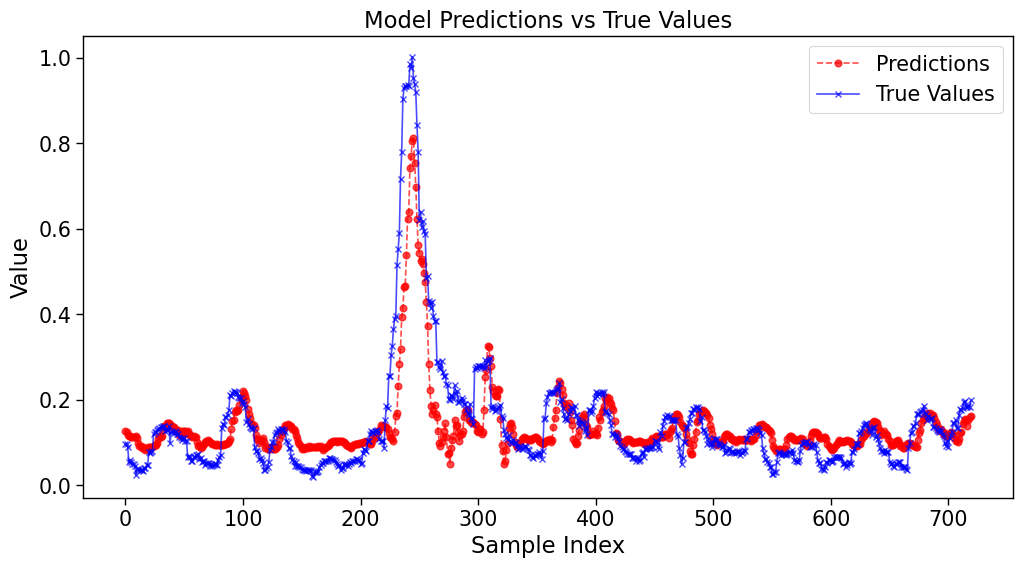

In [94]:
lstm_3.eval()

all_lstm_3_results = []
all_lstm_3_targets = []

with torch.no_grad():
    for inputs, targets in val_loader:
        #inputs = inputs.unsqueeze(2)
        outputs = lstm_3(inputs)
        all_lstm_3_results.append(outputs.flatten().numpy())
        all_lstm_3_targets.append(targets.flatten().numpy())

plt.figure(figsize=(12, 6))
plt.plot(np.concatenate(all_lstm_3_results), label='Predictions', linestyle='--', color='red', alpha=0.7, marker='o')
plt.plot(np.concatenate(all_lstm_3_targets), label='True Values', linestyle='-', color='blue', alpha=0.7, marker='x')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

## Muti-input lstm

In [95]:
df.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,log_returns,vol_current,vol_forward
14,1993-02-19,24.726739,24.815748,24.691135,24.815748,34900,19,4,7,2,1993,0.003593,0.008697,0.009444
15,1993-02-22,24.886951,24.940356,24.815744,24.904753,513600,22,0,8,2,1993,0.003580,0.008530,0.009506
16,1993-02-23,24.975966,24.993768,24.762344,24.886957,373700,23,1,8,2,1993,-0.000715,0.008512,0.009535
17,1993-02-24,24.904757,25.207388,24.904757,25.207388,26300,24,2,8,2,1993,0.012793,0.008749,0.009326
18,1993-02-25,25.189590,25.278599,25.136185,25.260798,44500,25,3,8,2,1993,0.002117,0.008692,0.008621


In [96]:
df2 = df.set_index('Date')
df2.head()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,log_returns,vol_current,vol_forward
Date,,,,,,,,,,,,,
1993-02-19,24.726739,24.815748,24.691135,24.815748,34900,19,4,7,2,1993,0.003593,0.008697,0.009444
1993-02-22,24.886951,24.940356,24.815744,24.904753,513600,22,0,8,2,1993,0.003580,0.008530,0.009506
1993-02-23,24.975966,24.993768,24.762344,24.886957,373700,23,1,8,2,1993,-0.000715,0.008512,0.009535
1993-02-24,24.904757,25.207388,24.904757,25.207388,26300,24,2,8,2,1993,0.012793,0.008749,0.009326
1993-02-25,25.189590,25.278599,25.136185,25.260798,44500,25,3,8,2,1993,0.002117,0.008692,0.008621


In [97]:
df2['hl_spread'] = np.log((df2['High'] - df2['Low'])/df2['Close'])
df2['co_spread'] = np.log(abs(df2['Close'] - df2['Open'])/df2['Open'])
df2['Volume'] = np.log(df2['Volume'])
df2['log_vol_current'] = np.log(df2['vol_current'])
df2['log_vol_forward'] = np.log(df2['vol_forward'])

df2.head()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,log_returns,vol_current,vol_forward,hl_spread,co_spread,log_vol_current,log_vol_forward
Date,,,,,,,,,,,,,,,,,
1993-02-19,24.726739,24.815748,24.691135,24.815748,10.460242,19,4,7,2,1993,0.003593,0.008697,0.009444,-5.294022,-5.626901,-4.744732,-4.662409
1993-02-22,24.886951,24.940356,24.815744,24.904753,13.149200,22,0,8,2,1993,0.003580,0.008530,0.009506,-5.297603,-7.242798,-4.764126,-4.655819
1993-02-23,24.975966,24.993768,24.762344,24.886957,12.831209,23,1,8,2,1993,-0.000715,0.008512,0.009535,-4.677849,-5.636930,-4.766228,-4.652827
1993-02-24,24.904757,25.207388,24.904757,25.207388,10.177324,24,2,8,2,1993,0.012793,0.008749,0.009326,-4.422378,-4.410300,-4.738804,-4.674965
1993-02-25,25.189590,25.278599,25.136185,25.260798,10.703244,25,3,8,2,1993,0.002117,0.008692,0.008621,-5.178266,-5.868590,-4.745357,-4.753555


In [98]:
features = ['log_vol_current', 'hl_spread', 'co_spread', 'Volume']

In [115]:
df2.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Day                0
Weekday            0
Week               0
Month              0
Year               0
log_returns        0
vol_current        0
vol_forward        0
hl_spread          0
co_spread          0
log_vol_current    0
log_vol_forward    0
dtype: int64

In [100]:
X = df2[features]
y = df2['log_vol_forward']

In [116]:
X.head()

,log_vol_current,hl_spread,co_spread,Volume
Date,,,,
1993-02-19,-4.744732,-5.294022,-5.626901,10.460242
1993-02-22,-4.764126,-5.297603,-7.242798,13.149200
1993-02-23,-4.766228,-4.677849,-5.636930,12.831209
1993-02-24,-4.738804,-4.422378,-4.410300,10.177324
1993-02-25,-4.745357,-5.178266,-5.868590,10.703244


In [101]:
X.shape, y.shape

((7658, 4), (7658,))

In [102]:
train_idx

Int64Index([  14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
            ...
            6567, 6568, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576],
           dtype='int64', length=6563)

In [103]:
X_train = X[:int(len(X)*0.85)]
y_train = y[:int(len(y)*0.85)]
X_val = X[int(len(X)*0.85):int(len(X)*0.95)]
y_val = y[int(len(y)*0.85):int(len(y)*0.95)]
X_test = X[int(len(X)*0.95):]
y_test = y[int(len(y)*0.95):]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((6509, 4), (6509,), (766, 4), (766,), (383, 4), (383,))

In [108]:
X_train, y_train = windowed_dataset(X_train, y_train, 14)
X_val, y_val = windowed_dataset(X_val, y_val, 14)
X_test, y_test = windowed_dataset(X_test, y_test, 14)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6495, 14, 4), (6495,), (752, 14, 4), (752,), (369, 14, 4), (369,))

In [109]:
batch_size = 1

In [111]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), 
                              torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                            torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                             torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [112]:
torch.tensor(X_train, dtype=torch.float32).shape

torch.Size([6495, 14, 4])

In [ ]:
mlstm_1 = LSTM2(input_dim=4, hidden_dim=32, num_layers=2, output_dim=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(mlstm_1.parameters(), lr=0.0000001)

epochs = 24
train_loss_history = []
val_loss_history = []
train_rmspe_history = []
val_rmspe_history = []

for epoch in trange(epochs):
    mlstm_1.train()
    train_loss = 0
    for inputs, targets in val_loader:
        optimizer.zero_grad()
        outputs = mlstm_1(inputs)
        exp_outputs = torch.exp(outputs)
        exp_targets = torch.exp(targets)
        print(outputs)
        print(targets)
        loss = criterion(exp_outputs, exp_targets)
        print(loss)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)


    mlstm_1.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = mlstm_1(inputs)
            val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    # val_rmspe = calculate_rmspe(targets, outputs)
    # val_rmspe_history.append(val_rmspe.item())